# Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load each cleaned CSV file
df_train = pd.read_csv('data/cleaned/train.csv')
df_validation = pd.read_csv('data/cleaned/validation.csv')
df_test = pd.read_csv('data/cleaned/test.csv')
print("Files loaded successfully.\n")

# Merge the DataFrames into one
df = pd.concat([df_train, df_validation, df_test], ignore_index=True)
print("Files merged successfully.\n")

# Display basic info and first few rows of the merged DataFrame
print(df.info())
print(df.head())


Files loaded successfully.

Files merged successfully.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12102 entries, 0 to 12101
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                12102 non-null  object
 1   question          12102 non-null  object
 2   question_concept  12102 non-null  object
 3   choices           12102 non-null  object
 4   answerKey         10962 non-null  object
dtypes: object(5)
memory usage: 472.9+ KB
None
                                 id  \
0  075e483d21c29a511267ef62bedc0461   
1  61fe6e879ff18686d7552425a36344c8   
2  4c1cb0e95b99f72d55c068ba0255c54d   
3  02e821a3e53cb320790950aab4489e85   
4  23505889b94e880c3e89cff4ba119860   

                                            question question_concept  \
0  The sanctions against the school were a punish...        punishing   
1  Sammy wanted to go to where the people were.  ...           people   
2  To locate 

In [45]:
# Check for missing values in each column
missing_summary = df.isnull().sum()
print("Missing values per column:")
print(missing_summary)
print("\nDataframe info:")
print(df.info())


Missing values per column:
id                     0
question               0
question_concept       0
choices                0
answerKey           1140
dtype: int64

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12102 entries, 0 to 12101
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                12102 non-null  object
 1   question          12102 non-null  object
 2   question_concept  12102 non-null  object
 3   choices           12102 non-null  object
 4   answerKey         10962 non-null  object
dtypes: object(5)
memory usage: 472.9+ KB
None


In [46]:
# Compute the length of the question text
df['question_length'] = df['question'].apply(lambda x: len(str(x)))

print("Question length statistics:")
print(df['question_length'].describe())

# Distribution of answer keys
print("\nAnswerKey distribution:")
print(df['answerKey'].value_counts())


Question length statistics:
count    12102.000000
mean        69.406379
std         29.545780
min         15.000000
25%         48.000000
50%         64.000000
75%         84.000000
max        376.000000
Name: question_length, dtype: float64

AnswerKey distribution:
answerKey
D    2236
B    2228
C    2187
E    2163
A    2148
Name: count, dtype: int64


In [47]:
concept_counts = df['question_concept'].value_counts()


unique_concept_count = df['question_concept'].nunique()
print("Number of unique question_concepts:", unique_concept_count)

print("Head of unique question_concepts with counts:")
print(concept_counts.head())

Number of unique question_concepts: 2231
Head of unique question_concepts with counts:
question_concept
person    351
people    227
human      94
water      62
cat        56
Name: count, dtype: int64


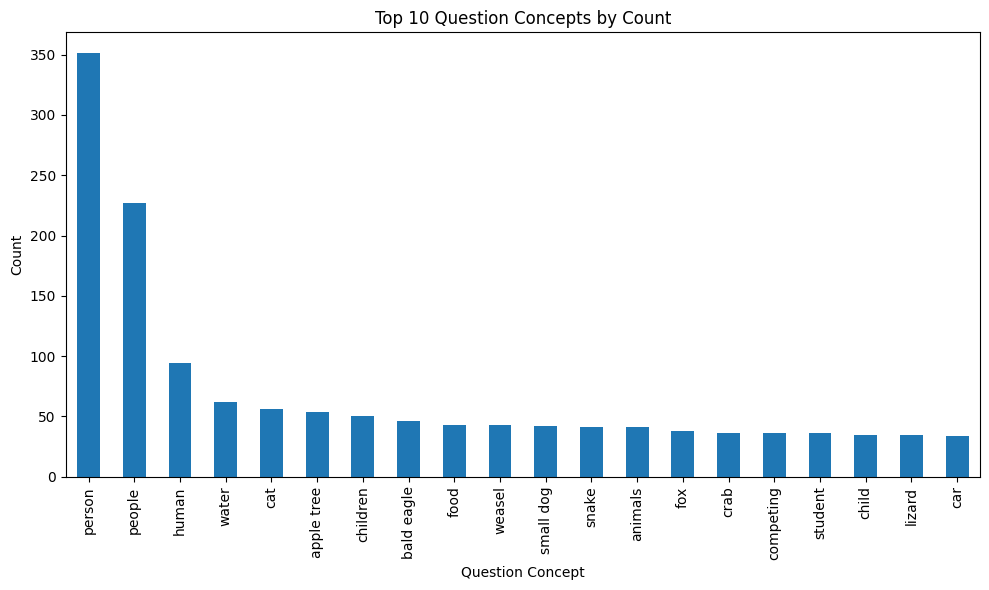

In [48]:
import matplotlib.pyplot as plt

# Get value counts sorted descending
concept_counts = df['question_concept'].value_counts()

# Define number of top concepts to show
top_n = 20
top_concepts = concept_counts.head(top_n)

plt.figure(figsize=(10, 6))
top_concepts.sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Question Concept")
plt.ylabel("Count")
plt.title("Top 10 Question Concepts by Count")
plt.tight_layout()
plt.show()
